In [37]:
%cd OSDA_course/lazy_fca
import lazy_pipeline as lpipe
import numpy as np
import pandas as pd 
df = pd.read_csv("/Users/aldargarmaev/OSDA/IBM.csv")
df.head()


[Errno 2] No such file or directory: 'OSDA_course/lazy_fca'
/Users/aldargarmaev/OSDA/OSDA_course/lazy_fca


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

# Adjusting Visual Styles
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.3)

# Ensure visualizations are displayed inline
%matplotlib inline


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [41]:
X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Department               1470 non-null   object
 2   DistanceFromHome         1470 non-null   int64 
 3   Education                1470 non-null   int64 
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   JobSatisfaction          1470 non-null   int64 
 7   MaritalStatus            1470 non-null   object
 8   MonthlyIncome            1470 non-null   int64 
 9   NumCompaniesWorked       1470 non-null   int64 
 10  WorkLifeBalance          1470 non-null   int64 
 11  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 137.9+ KB


In [43]:
# Specify the number of bins
for column in X.select_dtypes(include=['int64']).columns:
    X[column] = pd.cut(X[column], bins=3, labels=False)

# Perform one-hot encoding for categorical columns
X = pd.get_dummies(X)

In [44]:
X = lpipe.binarize_X(X)
X

,Age: 0,Age: 1,Age: 2,DistanceFromHome: 0,DistanceFromHome: 1,DistanceFromHome: 2,Education: 0,Education: 1,Education: 2,EnvironmentSatisfaction: 0,...,EducationField_Other: 0,EducationField_Other: 1,EducationField_Technical Degree: 0,EducationField_Technical Degree: 1,MaritalStatus_Divorced: 0,MaritalStatus_Divorced: 1,MaritalStatus_Married: 0,MaritalStatus_Married: 1,MaritalStatus_Single: 0,MaritalStatus_Single: 1
0,False,True,False,True,False,False,True,False,False,True,...,True,False,True,False,True,False,True,False,False,True
1,False,False,True,True,False,False,True,False,False,False,...,True,False,True,False,True,False,False,True,True,False
2,False,True,False,True,False,False,True,False,False,False,...,False,True,True,False,True,False,True,False,False,True
3,False,True,False,True,False,False,False,False,True,False,...,True,False,True,False,True,False,False,True,True,False
4,True,False,False,True,False,False,True,False,False,True,...,True,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,True,False,False,False,True,True,False,False,False,...,True,False,True,False,True,False,False,True,True,False
1466,False,True,False,True,False,False,True,False,False,False,...,True,False,True,False,True,False,False,True,True,False
1467,True,False,False,True,False,False,False,True,False,True,...,True,False,True,False,True,False,False,True,True,False
1468,False,False,True,True,False,False,False,True,False,False,...,True,False,True,False,True,False,False,True,True,False


In [45]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{'Age: 1',
 'Department_Human Resources: 0',
 'Department_Research & Development: 0',
 'Department_Sales: 1',
 'DistanceFromHome: 0',
 'Education: 0',
 'EducationField_Human Resources: 0',
 'EducationField_Life Sciences: 1',
 'EducationField_Marketing: 0',
 'EducationField_Medical: 0',
 'EducationField_Other: 0',
 'EducationField_Technical Degree: 0',
 'EnvironmentSatisfaction: 0',
 'JobSatisfaction: 2',
 'MaritalStatus_Divorced: 0',
 'MaritalStatus_Married: 0',
 'MaritalStatus_Single: 1',
 'MonthlyIncome: 0',
 'NumCompaniesWorked: 2',
 'WorkLifeBalance: 0',
 'YearsAtCompany: 0'}

In [46]:
y = y.values.tolist()

In [47]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(147, 1323)

In [48]:
y_test = y[n_train:]

In [49]:
%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


Predicting step by step: 100%|██████████| 1470/1470 [01:35<00:00, 13.83it/s]


In [50]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████| 1470/1470 [00:02<00:00, 442.52it/s]

CPU times: user 2.96 s, sys: 29.4 ms, total: 2.99 s
Wall time: 2.99 s


In [51]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

/Users/aldargarmaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/aldargarmaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/Users/aldargarmaev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(

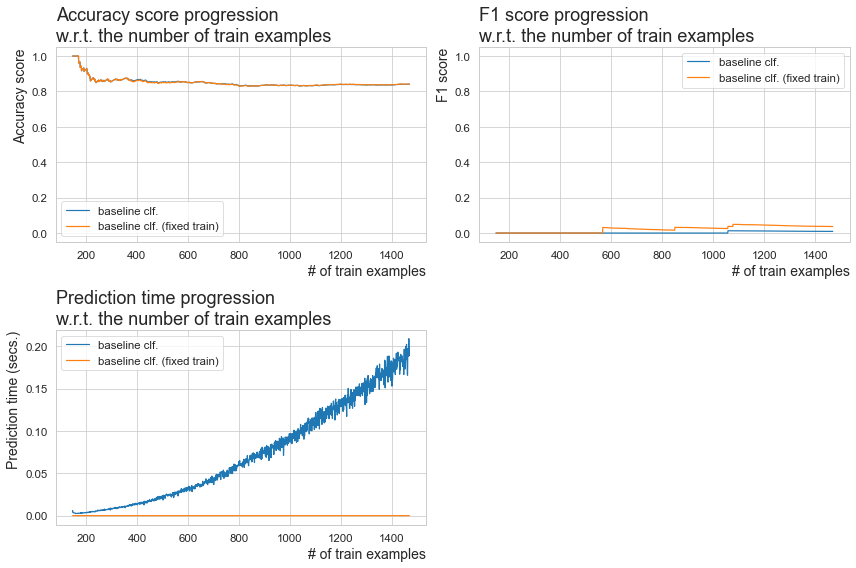

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [53]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

85.03437911496553

In [54]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

0.34290595988700484

In [55]:
n_train = int(len(X)*0.9)
n_test = len(X) - n_train
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [56]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

from sklearn import metrics

acc =  metrics.accuracy_score(y_test, y_pred) * 100
acc

85.03401360544217

In [57]:
from sklearn import tree
from sklearn.metrics import accuracy_score
DF = tree.DecisionTreeClassifier(max_depth=3,random_state=42)
DF = DF.fit(X_train, y_train)
y_pred = DF.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
acc

87.07482993197279

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
acc

86.39455782312925

In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
acc

72.78911564625851